Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.
--- CARACTERÍSTICAS DE LA IMAGEN ---
Tamaño: 640px de ancho x 480px de alto
Forma (Modo de color): RGB


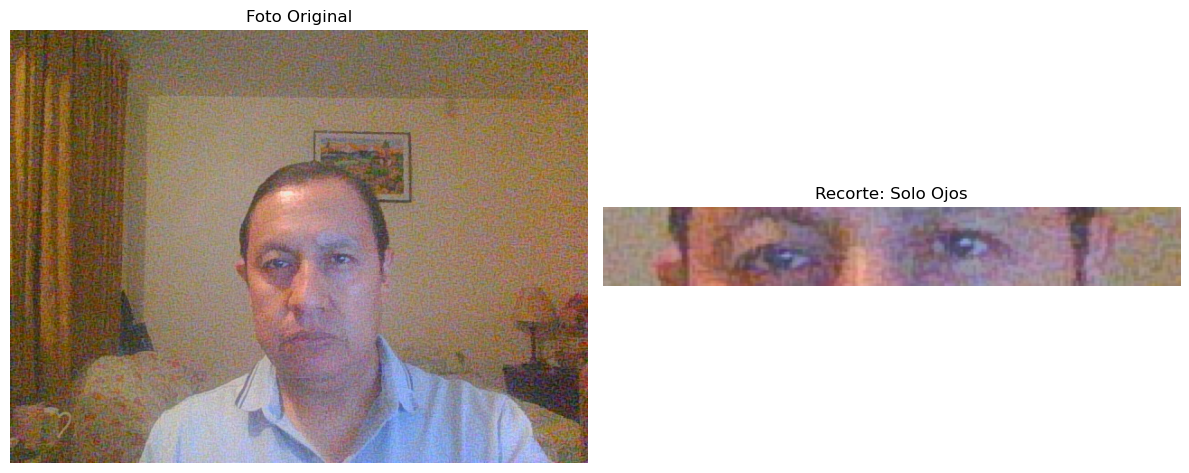

In [7]:
import cv2                 # Solo para la parte de la cámara
from PIL import Image
import matplotlib.pyplot as plt

# PASO 1: CAPTURA (Pillow no hace esta parte)
# 1.1 Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
else:
    print("Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.")

    while True:
        # 1.2. Leer un frame de la cámara
        ret, frame = cap.read()

        if not ret:
            print("Error al capturar el video.")
            break

        # 1.3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)

        # 1.4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):  # Si presiona 's', guarda la imagen
            nombre_foto = "foto_micara.jpg"
            cv2.imwrite(nombre_foto, frame)
            print(f"¡Foto guardada como {nombre_foto}!")
            break
        
        elif key == ord('q'):  # Si presiona 'q', sale sin guardar
            break

    # 1.5. Liberar la cámara y cerrar ventanas
    cap.release()
    cv2.destroyAllWindows()

# PASO 2: ANALISIS Y RECORTE (Con Pillow)
# # 2.1. CARGAR LA FOTO 
nombre_archivo = "foto_micara.jpg"

try:
    img_pil = Image.open(nombre_archivo)

    # 2.2 IMPRIMIR CARACTERÍSTICAS
    ancho, alto = img_pil.size
    
    forma = img_pil.mode

    print("--- CARACTERÍSTICAS DE LA IMAGEN ---")
    print(f"Tamaño: {ancho}px de ancho x {alto}px de alto")
    print(f"Forma (Modo de color): {forma}")

    # 2.3. RECORTAR SOLO LOS OJOS 
 
    area_ojos = (230, 240, 450, 270)
    img_ojos = img_pil.crop(area_ojos)

    # 2.4. VISUALIZACIÓN
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Foto Original
    axs[0].imshow(img_pil)
    axs[0].set_title("Foto Original")
    axs[0].axis('off')

    # Solo Ojos
    axs[1].imshow(img_ojos)
    axs[1].set_title("Recorte: Solo Ojos")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo}'")